In [99]:
#import sys
#!{sys.executable} -m pip install -U datefinder

In [100]:
#import sys
#!{sys.executable} -m pip install -U dateparser

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [11]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag
from nltk import word_tokenize

In [156]:
txt="I would like to make a claim with reference to my insurance policy number xyz12345. My social security number is 172-032-1123. My contact details are +60 (0)3 2723 7900 . I have recently suffered an accidental damage to my car. I, therefore, request the company to pay for the required repairs as covered by my automobile insurance policy. The accident took place this Wednesday on the 20th of March. I was driving to my office in the morning using my regular route. Unfortunately, an over-speeding car collided with my Toyota near the ABC roundabout. The car was so fast that it hit me without giving me any time to react. As a result, I could not turn away in time to avoid the collision. Although the accident did not cause any injuries to me, the left rear door of my car has been badly smashed. In addition, there are also two huge dents at the right part of the car as it was pushed to the sidewalk due to the collision. My automobile, therefore, requires some major repairs. The mechanic has inspected the damages and given me an estimated quote for the repairs amounting to $650/-. I have enclosed the detailed estimates with the letter. According to my policy, the insurance will cover the entire repair expenditure at $150/- deductible. Kindly pay my claim as soon as possible so that I can go ahead with the repairing process. My car will remain at the workshop for at least 2 weeks for the repairs. It is going to be an inconvenience to me during this time. Therefore, I look forward to your quick response to avoid unpleasant delays."

In [176]:
#ssn number
import re
x = re.search("([0-9]{3}-){2}[0-9]{4}", txt)
print(x)
x.group(0)

<_sre.SRE_Match object; span=(113, 125), match='172-032-1123'>


'172-032-1123'

In [177]:
#Extracting phone numbers
#phn=re.search("(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})", txt)
#print(phn)
#phn.group(0)
txt="""I would like to make a claim with reference to my insurance policy number xyz12345. My social security number is 172-032-1123. My contact details are +601-4228-8055. I have recently suffered an accidental damage to my car. I, therefore, request the company to pay for the required repairs as covered by my automobile insurance policy. The accident took place this Wednesday on the 20th of March. I was driving to my office in the morning using my regular route. Unfortunately, an over-speeding car collided with my Toyota near the ABC roundabout. The car was so fast that it hit me without giving me any time to react. As a result, I could not turn away in time to avoid the collision. Although the accident did not cause any injuries to me, the left rear door of my car has been badly smashed. In addition, there are also two huge dents at the right part of the car as it was pushed to the sidewalk due to the collision. My automobile, therefore, requires some major repairs. The mechanic has inspected the damages and given me an estimated quote for the repairs amounting to $650/-. I have enclosed the detailed estimates with the letter. According to my policy, the insurance will cover the entire repair expenditure at $150/- deductible. Kindly pay my claim as soon as possible so that I can go ahead with the repairing process. My car will remain at the workshop for at least 2 weeks for the repairs. It is going to be an inconvenience to me during this time. Therefore, I look forward to your quick response to avoid unpleasant delays."""
for i in re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', txt):
    if i==x.group(0):
        continue
    print(i)
#print(i)
#[print(i) for i in re.findall(r'\+[-()\s\d]+?(?=\s*[+<])', txt)]
#[print(i) for i in re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', txt)]

+601-4228-8055


In [130]:
ssn=x.group(0)
ssn
int(ssn[0:3])
#we can hard code the area information and extract area as Pennsylvania

172

In [119]:
#AAA-GG-SSSS. The first three-digit field is called the "area number". The central, two-digit field is called the "group number". The final, four-digit field is called the "serial number".
"""001–003	New Hampshire
004–007	Maine
008–009	Vermont
010–034	Massachusetts
035–039	Rhode Island
040–049	Connecticut
050–134	New York
135–158	New Jersey
159–211	Pennsylvania
212–220	Maryland
221–222	Delaware
223–231	Virginia
232–236	West Virginia
232, 237–246	North Carolina
247–251	South Carolina
252–260	Georgia
261–267	Florida
268–302	Ohio
303–317	Indiana
318–361	Illinois
362–386	Michigan
387–399	Wisconsin
400–407	Kentucky
408–415	Tennessee
416–424	Alabama
425–428	Mississippi
429–432	Arkansas
433–439	Louisiana
440–448	Oklahoma
449–467	Texas
468–477	Minnesota
478–485	Iowa
486–500	Missouri
501–502	North Dakota
503–504	South Dakota
505–508	Nebraska
509–515	Kansas
516–517	Montana
518–519	Idaho
520	Wyoming
521–524	Colorado
525, 585	New Mexico
526–527	Arizona
528–529	Utah
530, 680	Nevada
531–539	Washington
540–544	Oregon
545–573	California
574	Alaska
575–576	Hawaii
577–579	District of Columbia
580	Virgin Islands
580–584	Puerto Rico
586	Pacific Islands
Guam
American Samoa
Philippine Islands
Northern Mariana Islands
587–665	California (Southern California and the Central Valley.)
667–679	Not Issued
681–699	Not Issued
700–728	Railroad Board (discontinued July 1, 1963)
729–730	Enumeration at Entry
750–772	Not Issued"""

'001–003\tNew Hampshire\n004–007\tMaine\n008–009\tVermont\n010–034\tMassachusetts\n035–039\tRhode Island\n040–049\tConnecticut\n050–134\tNew York\n135–158\tNew Jersey\n159–211\tPennsylvania\n212–220\tMaryland\n221–222\tDelaware\n223–231\tVirginia\n232–236\tWest Virginia\n232, 237–246\tNorth Carolina\n247–251\tSouth Carolina\n252–260\tGeorgia\n261–267\tFlorida\n268–302\tOhio\n303–317\tIndiana\n318–361\tIllinois\n362–386\tMichigan\n387–399\tWisconsin\n400–407\tKentucky\n408–415\tTennessee\n416–424\tAlabama\n425–428\tMississippi\n429–432\tArkansas\n433–439\tLouisiana\n440–448\tOklahoma\n449–467\tTexas\n468–477\tMinnesota\n478–485\tIowa\n486–500\tMissouri\n501–502\tNorth Dakota\n503–504\tSouth Dakota\n505–508\tNebraska\n509–515\tKansas\n516–517\tMontana\n518–519\tIdaho\n520\tWyoming\n521–524\tColorado\n525, 585\tNew Mexico\n526–527\tArizona\n528–529\tUtah\n530, 680\tNevada\n531–539\tWashington\n540–544\tOregon\n545–573\tCalifornia\n574\tAlaska\n575–576\tHawaii\n577–579\tDistrict of Columbi

In [120]:
txt

'I would like to make a claim with reference to my insurance policy number xyz12345. My social security number is 172-032-1123. I have recently suffered an accidental damage to my car. I, therefore, request the company to pay for the required repairs as covered by my automobile insurance policy. The accident took place this Wednesday on the 20th of March. I was driving to my office in the morning using my regular route. Unfortunately, an over-speeding car collided with my Toyota near the ABC roundabout. The car was so fast that it hit me without giving me any time to react. As a result, I could not turn away in time to avoid the collision. Although the accident did not cause any injuries to me, the left rear door of my car has been badly smashed. In addition, there are also two huge dents at the right part of the car as it was pushed to the sidewalk due to the collision. My automobile, therefore, requires some major repairs. The mechanic has inspected the damages and given me an estima

In [121]:
text_tagged = pos_tag(word_tokenize(txt))
text_tagged

[('I', 'PRP'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('a', 'DT'),
 ('claim', 'NN'),
 ('with', 'IN'),
 ('reference', 'NN'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('insurance', 'NN'),
 ('policy', 'NN'),
 ('number', 'NN'),
 ('xyz12345', 'NNP'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('social', 'JJ'),
 ('security', 'NN'),
 ('number', 'NN'),
 ('is', 'VBZ'),
 ('172-032-1123', 'JJ'),
 ('.', '.'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('recently', 'RB'),
 ('suffered', 'VBN'),
 ('an', 'DT'),
 ('accidental', 'JJ'),
 ('damage', 'NN'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('car', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 (',', ','),
 ('therefore', 'RB'),
 (',', ','),
 ('request', 'VB'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('pay', 'VB'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('required', 'JJ'),
 ('repairs', 'NNS'),
 ('as', 'IN'),
 ('covered', 'VBN'),
 ('by', 'IN'),
 ('my', 'PRP$'),
 ('automobile', 'NN'),
 ('insurance', 'NN'),
 ('policy', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('accident

In [131]:
#as price information is sensitive, we are currently not implementing any code to extract price information

In [122]:
# JJ adjective
# NN noun
# RB adverb
# ADJ adjective
# ADV adverb
# CNJ conjunction
# NP proper noun
#[word for word, tag in text_tagged if tag in ['NN','NNS','NNP','NNPS']]
[word for word, tag in text_tagged if tag in ['NNP']] #to get only proper nouns
#JJ for adjective 
#[word for word, tag in text_tagged if tag in ['NN','NNS','NNP','NNPS', 'JJ']]


#Observations made
#NNP if we have NN after or before it is a very good information to us. (like ABC roundabout (location information we are getting))

# if there is adjective before NNS or NN (it means they are talking about the issues) (Ex: major repairs, entire repair, estimated quote, quick response, )

['xyz12345', 'Wednesday', 'March', 'Toyota', 'ABC', 'My']

In [123]:
[word for word, tag in text_tagged if tag in ['NNS']] #where we have s at end of the word 

['repairs',
 'injuries',
 'dents',
 'repairs',
 'damages',
 'repairs',
 'estimates',
 'weeks',
 'repairs',
 'delays']

In [124]:
[word for word, tag in text_tagged if tag in ['NNS', 'NN', 'NNP', 'JJ']] #where we have s at end of the word 

['claim',
 'reference',
 'insurance',
 'policy',
 'number',
 'xyz12345',
 'social',
 'security',
 'number',
 '172-032-1123',
 'accidental',
 'damage',
 'car',
 'company',
 'required',
 'repairs',
 'automobile',
 'insurance',
 'policy',
 'accident',
 'place',
 'Wednesday',
 'March',
 'office',
 'morning',
 'regular',
 'route',
 'over-speeding',
 'car',
 'Toyota',
 'ABC',
 'roundabout',
 'car',
 'time',
 'result',
 'time',
 'collision',
 'accident',
 'injuries',
 'left',
 'rear',
 'door',
 'car',
 'addition',
 'huge',
 'dents',
 'right',
 'part',
 'car',
 'sidewalk',
 'due',
 'collision',
 'My',
 'automobile',
 'major',
 'repairs',
 'mechanic',
 'damages',
 'estimated',
 'quote',
 'repairs',
 '650/-',
 'detailed',
 'estimates',
 'letter',
 'policy',
 'insurance',
 'entire',
 'repair',
 'expenditure',
 '150/-',
 'deductible',
 'claim',
 'possible',
 'process',
 'car',
 'workshop',
 'weeks',
 'repairs',
 'inconvenience',
 'time',
 'quick',
 'response',
 'unpleasant',
 'delays']

In [23]:
import datefinder
dt=datefinder.find_dates(txt, source=False, index=False, strict=False, base_date=None)

In [24]:
list(dt)

[datetime.datetime(2020, 3, 4, 0, 0),
 datetime.datetime(2020, 3, 20, 0, 0),
 datetime.datetime(650, 2, 28, 0, 0),
 datetime.datetime(150, 2, 28, 0, 0),
 datetime.datetime(2020, 2, 2, 0, 0)]

In [43]:
from dateparser.search import search_dates
dates = search_dates(txt)

In [44]:
dates

[('Wednesday on the 20th of March', datetime.datetime(2020, 3, 20, 0, 0)),
 ('2 weeks', datetime.datetime(2020, 3, 6, 0, 0))]

In [45]:
txt.lower()

'i would like to make a claim with reference to my insurance policy number xyz12345. i have recently suffered an accidental damage to my car. i, therefore, request the company to pay for the required repairs as covered by my automobile insurance policy. the accident took place this wednesday on the 20th of march. i was driving to my office in the morning using my regular route. unfortunately, an over-speeding car collided with my toyota near the abc roundabout. the car was so fast that it hit me without giving me any time to react. as a result, i could not turn away in time to avoid the collision. although the accident did not cause any injuries to me, the left rear door of my car has been badly smashed. in addition, there are also two huge dents at the right part of the car as it was pushed to the sidewalk due to the collision. my automobile, therefore, requires some major repairs. the mechanic has inspected the damages and given me an estimated quote for the repairs amounting to $650

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
bag_of_words = count.fit_transform(txt)

ValueError: Iterable over raw text documents expected, string object received.

In [ ]:
for line in txt.lower():
    if "toyota" in line: print(line)

In [65]:
#"w+": This expression matches the alphanumeric character in the string
#"^": This expression matches the start of a string
import re
#re.findall(r"^\w+",txt)
regex = r"([a-zA-Z]+) (\d+)"
re.search(regex, txt)

<_sre.SRE_Match object; span=(295, 301), match='the 20'>

In [58]:
txt

'I would like to make a claim with reference to my insurance policy number xyz12345. I have recently suffered an accidental damage to my car. I, therefore, request the company to pay for the required repairs as covered by my automobile insurance policy. The accident took place this Wednesday on the 20th of March. I was driving to my office in the morning using my regular route. Unfortunately, an over-speeding car collided with my Toyota near the ABC roundabout. The car was so fast that it hit me without giving me any time to react. As a result, I could not turn away in time to avoid the collision. Although the accident did not cause any injuries to me, the left rear door of my car has been badly smashed. In addition, there are also two huge dents at the right part of the car as it was pushed to the sidewalk due to the collision. My automobile, therefore, requires some major repairs. The mechanic has inspected the damages and given me an estimated quote for the repairs amounting to $650

In [70]:
#Search the string to see if it starts with "The" and ends with "Spain":
import re
txt = "The rain in Spain"
x = re.search("^The.*Spain$", txt)
print(x)

None


In [87]:
#for policy number
import re
x = re.findall("([a-zA-Z]{3}[0-9]{4})", txt)
print(x)

['xyz1234']


In [88]:
from dateparser.search import search_dates
dates = search_dates(txt)
dates

[('Wednesday on the 20th of March', datetime.datetime(2020, 3, 20, 0, 0)),
 ('2 weeks', datetime.datetime(2020, 3, 6, 0, 0))]

In [68]:
import re
txt = "The rain in Spain"
x = re.findall("ai", txt)
print(x)

['ai', 'ai']


In [125]:
import re
x = re.search("([a-zA-Z]{3})[0-9]{4}", txt)
print(x)
x.group(0)

<_sre.SRE_Match object; span=(74, 81), match='xyz1234'>


'xyz1234'

In [109]:
import re
txt = "The rain in465 31-02-2010 Spain"
x = re.search("\d{2}-\d{2}-\d{4}", txt)
print(x)

<_sre.SRE_Match object; span=(15, 25), match='31-02-2010'>


In [110]:
import re
txt = "The rain in465 Spain"
x = re.search("\d", txt)
print(x)

<_sre.SRE_Match object; span=(11, 12), match='4'>


In [111]:
from nltk import word_tokenize
txt="I would like to make a claim with reference to my insurance policy number xyz12345. I have recently suffered an accidental damage to my car. I, therefore, request the company to pay for the required repairs as covered by my automobile insurance policy. The accident took place this Wednesday on the 20th of March. I was driving to my office in the morning using my regular route. Unfortunately, an over-speeding car collided with my Toyota near the ABC roundabout. The car was so fast that it hit me without giving me any time to react. As a result, I could not turn away in time to avoid the collision. Although the accident did not cause any injuries to me, the left rear door of my car has been badly smashed. In addition, there are also two huge dents at the right part of the car as it was pushed to the sidewalk due to the collision. My automobile, therefore, requires some major repairs. The mechanic has inspected the damages and given me an estimated quote for the repairs amounting to $650/-. I have enclosed the detailed estimates with the letter. According to my policy, the insurance will cover the entire repair expenditure at $150/- deductible. Kindly pay my claim as soon as possible so that I can go ahead with the repairing process. My car will remain at the workshop for at least 2 weeks for the repairs. It is going to be an inconvenience to me during this time. Therefore, I look forward to your quick response to avoid unpleasant delays."
txt_token=word_tokenize(txt)
txt_token

['I',
 'would',
 'like',
 'to',
 'make',
 'a',
 'claim',
 'with',
 'reference',
 'to',
 'my',
 'insurance',
 'policy',
 'number',
 'xyz12345',
 '.',
 'I',
 'have',
 'recently',
 'suffered',
 'an',
 'accidental',
 'damage',
 'to',
 'my',
 'car',
 '.',
 'I',
 ',',
 'therefore',
 ',',
 'request',
 'the',
 'company',
 'to',
 'pay',
 'for',
 'the',
 'required',
 'repairs',
 'as',
 'covered',
 'by',
 'my',
 'automobile',
 'insurance',
 'policy',
 '.',
 'The',
 'accident',
 'took',
 'place',
 'this',
 'Wednesday',
 'on',
 'the',
 '20th',
 'of',
 'March',
 '.',
 'I',
 'was',
 'driving',
 'to',
 'my',
 'office',
 'in',
 'the',
 'morning',
 'using',
 'my',
 'regular',
 'route',
 '.',
 'Unfortunately',
 ',',
 'an',
 'over-speeding',
 'car',
 'collided',
 'with',
 'my',
 'Toyota',
 'near',
 'the',
 'ABC',
 'roundabout',
 '.',
 'The',
 'car',
 'was',
 'so',
 'fast',
 'that',
 'it',
 'hit',
 'me',
 'without',
 'giving',
 'me',
 'any',
 'time',
 'to',
 'react',
 '.',
 'As',
 'a',
 'result',
 ',',
 'I

In [102]:
#import sys
#!{sys.executable} -m pip install -U wordcloud

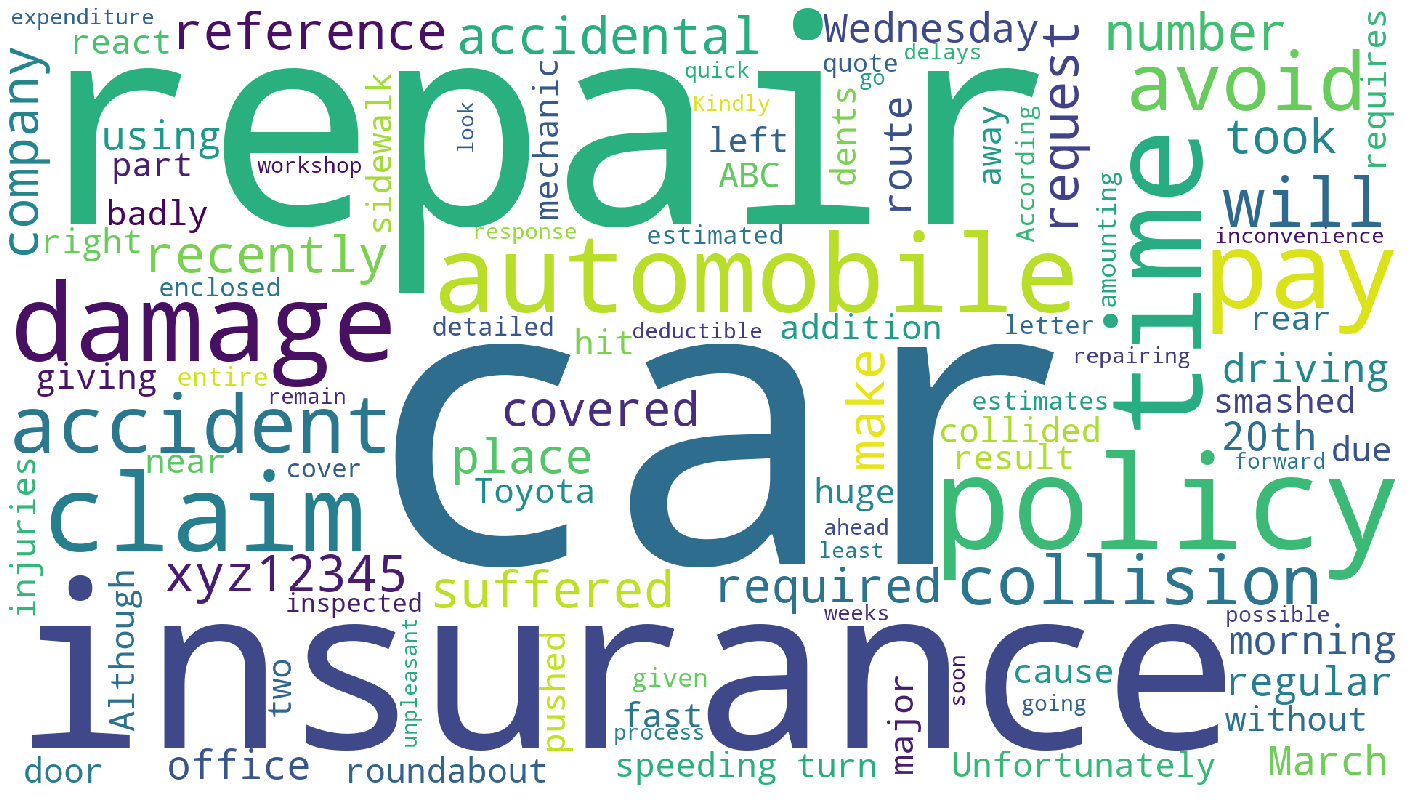

In [112]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(txt_token))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()